In [1]:
# !/usr/bin/env python3
from cem_LSTM import *
from convert_keras_frozen import load_default_frozen_model
import tool_statedata
import sys
import numpy as np

In [2]:
tool_sim  = tool_statedata.datacontroller("simulation")

modelname = "old/LSTM_V9_Combinations_2"
# modelname = "old/DelayDKN_Model_12_V9_Combinations_DelayEmbedding"
# modelname = "old/DelayDKN_Model_13_V9_Combinations_DelayEmbedding_more_epochs"
# modelname = "old/DelayFCN_Model_12_V9_fixed_E250"
# modelname = "old/DelayFCN_Model_12_V9_fixed_E25"

# modelname = "latent_analysis/new_DelayDKN_soft_1eigfn"
# modelname = "latent_analysis/new_DelayDKN_soft_2eigfn"
# modelname = "latent_analysis/new_DelayDKN_soft_3eigfn"
# modelname = "latent_analysis/new_DelayDKN_soft_4eigfn"
# modelname = "latent_analysis/new_DelayDKN_soft_5eigfn"
# modelname = "latent_analysis/new_DelayDKN_soft_10eigfn"

# modelname = "DelayDKN_oldArch_E250"
# modelname = "DelayDKN_newArch_E250"
# modelname = "DelayFCN_E25"

# modelname = "frozen_graph_standup_1_1ceigfn_0reigfn"
# modelname = "frozen_graph_standup_1_2ceigfn_0reigfn"
# modelname = "frozen_graph_standup_1_10ceigfn_0reigfn"

# modelname = "frozen_graph_soft_1eigfn"
# modelname = "frozen_graph_soft_2eigfn"
# modelname = "frozen_graph_soft_3eigfn"
# modelname = "frozen_graph_soft_4eigfn"
# modelname = "frozen_graph_soft_5eigfn"
# modelname = "frozen_graph_soft_6eigfn"
# modelname = "frozen_graph_soft_7eigfn"
# modelname = "frozen_graph_soft_8eigfn"
modelname = "frozen_graph_soft_9eigfn"
# modelname = "frozen_graph_soft_10eigfn"
# modelname = "frozen_graph_soft_11eigfn"
# modelname = "frozen_graph_soft_20eigfn"
# modelname = "frozen_graph_soft_30eigfn"
# modelname = "frozen_graph_soft_50eigfn"
# modelname = "frozen_graph_soft_1eigfn_largernetwork"

model = load_default_frozen_model(modelname)

In [3]:
freq = 20
p_tgt = 0.0
x_target = np.array([0,0])
x_pred = [-0.5, 0, 0.0]
u = 0
history = 50
x_0 = np.array([x_pred[0],x_pred[1],x_pred[2],u])
x_history = np.repeat(x_0[np.newaxis],history-1,axis=0)

In [6]:
for i in range(freq*30):
    p = x_pred[0]
    dp = x_pred[1]
    th = x_pred[2]
    dth = u

    x_current = np.array([p,dp,th,u])
    x_history = np.concatenate([x_history,np.expand_dims(x_current,axis=0)], axis=0)
    u_next_step, reward = fn_control_prediction(model, x_history, x_target)

    P = 0.1
    D = 0.3
    u_PD = P*(p-p_tgt) + D*dp

    u = u_PD
    # u = 0
    # u = u_next_step

    x_pred = fn_dynamics(model, np.expand_dims(x_history,axis=0))[0]

    x_history = np.delete(x_history, 0, 0)                
    x_history[-1,3] = u

    tool_sim.dataAppend(p, dp, th, dth, u)

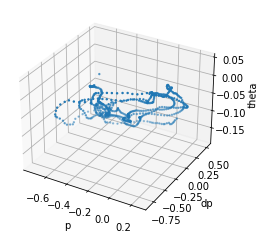

In [7]:
tool_sim.dataPlot()
# tool_sim.detaSave("result_sim")